In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [15]:
SIZE = 224 

In [9]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100]'], with_info=True, as_supervised=True)

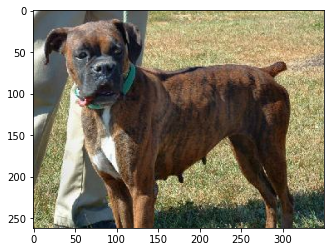

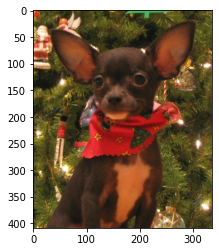

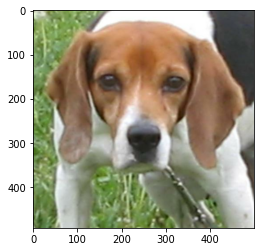

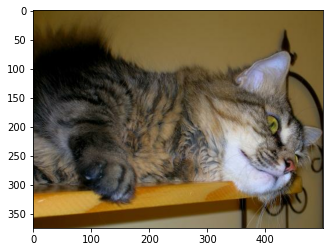

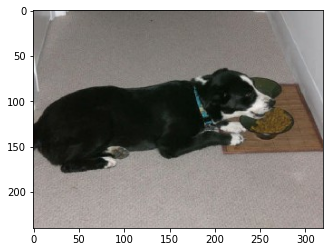

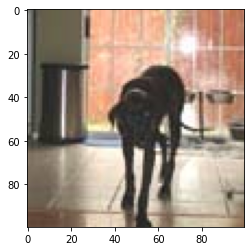

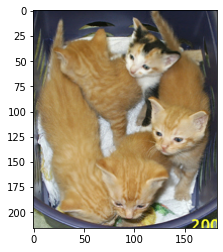

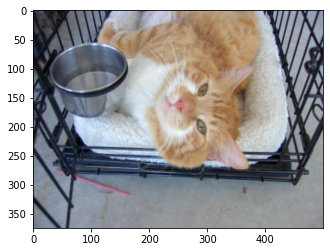

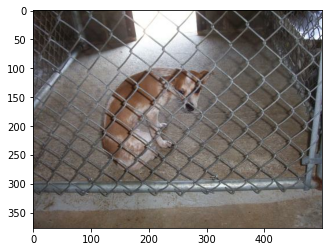

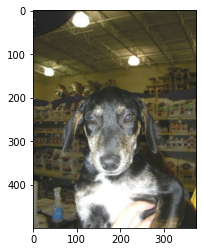

In [21]:
for img, _ in train[0].take(10):
  plt.figure()
  plt.imshow(img)

In [32]:
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [33]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [34]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False 

In [35]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)                     
])  

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [38]:
model.fit(train_batches, epochs=1)

7/7 [==============================] - 4s 481ms/step - loss: 0.1838 - accuracy: 0.9200


In [42]:
model.fit(train_batches, epochs=1)

7/7 [==============================] - 4s 484ms/step - loss: 0.1377 - accuracy: 0.9600


In [65]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Котек -1.2150975465774536')

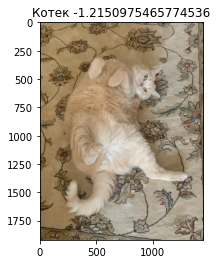

In [72]:
img = load_img('Syoma1.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Котек' if prediction < 0 else 'Собакен'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

Text(0.5, 1.0, 'Котек -1.2494003772735596')

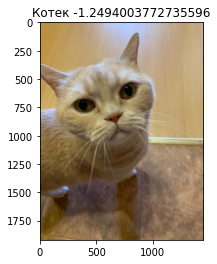

In [73]:
img = load_img('Syoma2.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Котек' if prediction < 0 else 'Собакен'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

Text(0.5, 1.0, 'Собакен 3.552194118499756')

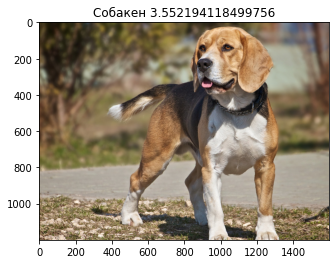

In [74]:
img = load_img('Dog1.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Котек' if prediction < 0 else 'Собакен'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

Text(0.5, 1.0, 'Собакен 2.9691648483276367')

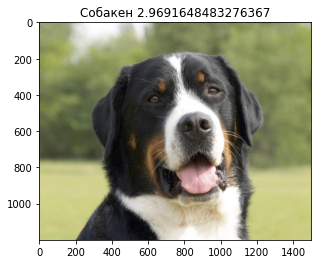

In [75]:
img = load_img('Dog2.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Котек' if prediction < 0 else 'Собакен'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

Text(0.5, 1.0, 'Собакен 1.1019936800003052')

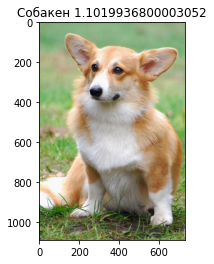

In [76]:
img = load_img('Dog3.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Котек' if prediction < 0 else 'Собакен'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')